<a href="https://colab.research.google.com/github/zhong338/MFM-FM5222/blob/main/Week11__FM_cov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FM 5222
# Factor Models and Cross Correlation


In this video, I will describe the general setup of a factor model and how it can be fitted using the kind of linear regressions we have already seen.  

I will then construct an example to explain why a factor model has advantages in term of understanding the correlation matrix of a set of assets as opposed to attempting to directly estimate the coefficients.



## Factor Models

Recall that in general, a Factor model of log-returns can be written as

$$R_{j,t} = \beta_{0,j} + \beta_{1,j}F_{1,t} + \beta_{2,j}F_{2,t} + \cdots + \beta_{j,n}F_{p,t} + \epsilon_{j,t}$$


where there are $n$ assets indexed by $j$, $p$ factors and $n\times (p+1)$ factor loadings $\beta_{k,j}$

We assume that the noises are uncorrelated (hopefully independent) both temporally 

$$\mathrm{Cov}(\epsilon_{j,t},\epsilon_{j,s}) = 0, t \neq s$$

and cross-sectionally

$$\mathrm{Cov}(\epsilon_{j,t},\epsilon_{i,t}) = 0, j \neq i$$


Furthermore, it is assumed that the factors are uncorrelated to the noise terms:


$$\mathrm{Cov}(F_{k,t}, \epsilon_{j,s}) = 0, \forall (k,j,t,s)$$









### Matrix Formulation

Let's formulate this using matrices.

We let $F$ be the $p\times N$ matrix of observations of the factors.   We can then construct the data matrix

$$X = \begin{bmatrix}\mathbf{1}_c & F^T \\ \end{bmatrix}$$

where $\mathbf{1}_c$ is an $N$ dimenstional column vector of of ones.

Note that $X$ is $N \times (p+1)$

We let

$$B_0 = [\beta_{0,1}, \beta_{0,2}, ..., \beta_{0,n}]$$

be the row vector representing the constanst term of each of the $n$ assets.

And 




$$B = \begin{bmatrix} \mathbf{\beta}_1^T & \mathbf{\beta}_2^T & \cdots & \mathbf{\beta}_n^T \\ \end{bmatrix}   $$

where $\mathbf{\beta}_j^T$ is the column vector with elements $\beta_{k,j}, k>0$

Note that $B$ is $p \times n$


$R^T$ is the $N \times n$ matrix whose $j^{th}$ column correspond to the observed returns of asset $j$.


$E$ is the matrix valuess White Noise Random Variable where the $j^{th}$ column  associated with asset $j$ and each column is IID and uncorrelated with the other columns.   $E$ will be $N \times n$






Given the data, we can then write our model as


$$X \begin{bmatrix}B_0 \\ B\\ \end{bmatrix} = R^T + E$$



Fitting this is no different than the case where $p = 1$, we use the pseudo-inverse:

$$\begin{bmatrix}\hat{B}_0 \\ \hat{B}\\ \end{bmatrix} = (X^TX)^{-1}X^T R^T$$


In addtion to estimating the factor loadings, we will want to estimate

1. The expected returns of the factors.  Call these $\mu_1, \mu_2 , ..., \mu_p$  (sometimes we don't care about this)

2. The $p\times p$ covariance matrix of the factors $\Sigma_F$

3. The $n \times n$ covariance matrix of the White noise $\Sigma_{\epsilon}$.  Note that $\Sigma_{\epsilon}$ is diagonal with elements $\sigma^2_{j}$ corresponding to the $j^{th}$  asset.



This means that the model will require to to estimate


$$n + np + p + \frac{p(p+1)}{2} + n = n(p+2) +p + \frac{p(p+1)}{2}$$

parameters.

Note however that if we are tracking $n$ assets, then we will have 

$n \times N$ data points, which should be suitable for $N >>p$




### Estimating the Covariance of the Assets

If we are interested in the cross-corrrelations the Assets, we are equivalently interested in the Covariance matrix of the asset returns.  

Under the model, covariance matrix of the assets returns will be given by

$$\mathrm{Cov}(R) = B^T \Sigma_{F} B + \Sigma_{\epsilon}$$



So we now have two ways we could attempt to estimate  $\mathrm{Cov}(R)$


1. Directly estimate the $\frac{n(n+1)}{2}$ elements of the matrix from the data via the sample covariance matrix.

2. Fit the model and use the above equation.


In the first case, we are estimating $\frac{n(n+1)}{2}$ parameters with $N$ data points.

In the second, we need $B, \Sigma_{F}$, and $\Sigma_{\epsilon}$.  This means $np +\frac{p(p+1)}{2} + n$ parameters.


When using factor models, it not uncommon to have $100$ or more assets.  So let's suppose we had $p = 5$ factors and $n$ assets and compare how many parameters we need to estimate for $\mathrm{Cov}(R)$ as a function of $n$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

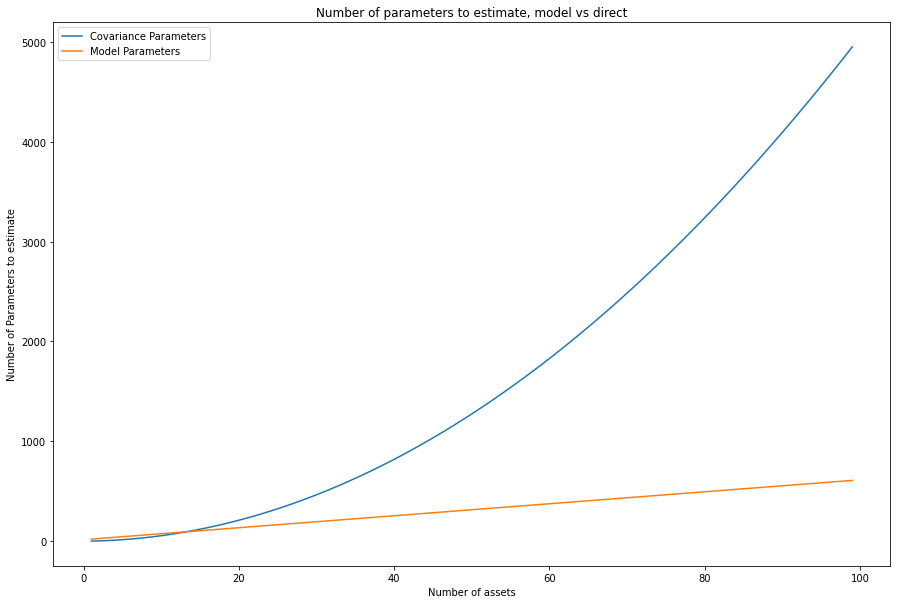

In [ ]:
p = 5

direct = lambda n: n*(n+1)/2

model = lambda n: n*p  +p*(p+1)/2 + n


n  = np.arange(1,100)


plt.figure(figsize = (15,10))

plt.plot(n, direct(n), label= "Covariance Parameters")

plt.plot(n, model(n), label = "Model Parameters")

plt.legend()

plt.ylabel("Number of Parameters to estimate")

plt.xlabel("Number of assets")

plt.title("Number of parameters to estimate, model vs direct")
plt.show()

Estimating thousands of parameters is quite difficult and usually comes with high levels of uncertainty. For this reason, the factor model can be helpful

**Caveat**   If the model is a poor match to reality, you may only be fooling yourself.

## Example

To illustrate this further, we will create data for model with $p =3$ factors and $n = 100$ asssets.   We will then estimate parameters both ways.  We will repeat $200$ times to indicate how well each approach appear to work. 


To simplify things, we will set our model with $B_0 = \mathbf{0}$


First we set up the "true parameters".

We will set 


$[\mu_1, \mu_2, \mu_3]  = [0,0,0]$


$\Sigma_{F} = \frac{1}{252}\begin{pmatrix}.3^2 &0 & 0\\0 &.2^2 &0 \\0 &0 & .1^2\\ \end{pmatrix} $ 

$\Sigma_{\epsilon} = .0001 I_{100}$


We will create the rows of B by drawing from the uniform distibution.





In [ ]:
p = 3
n= 100

N = 1000


np.random.seed(765)

B = np.random.uniform(size = [3,n])

sigmaF = 1/252*np.array([[.09,0,0],[0,.04,0], [0,0,.01]])


sigmaE = np.diag(.0002* np.ones(100))
                   



According to the model,

$$\mathrm{Cov}(R) = B^T \Sigma_{F} B + \Sigma_{\epsilon}$$

In [ ]:
covR = B.T@sigmaF@B + sigmaE



In [ ]:
## Generating returns

Freturns = np.random.multivariate_normal(np.zeros(3), sigmaF, size = N)

WN =np.random.multivariate_normal(np.zeros(n), sigmaE, size = N)

In [ ]:
Rmatrix = Freturns@B + WN

In [ ]:
Rmatrix.shape

(1000, 100)

First we attempt to estimate covR directly from the data.

In [ ]:
hat_covR_1 = np.cov(Rmatrix.T)

Next, we estimate the model and estimate the covariance from that. 

In [ ]:
hatB = np.linalg.pinv(Freturns)@Rmatrix


hatsigmaF = np.cov(Freturns.T)

residuals = Rmatrix - Freturns@hatB

hatsigmaE = np.diag(np.var(residuals, axis =0))




In [ ]:
hat_covR_2 = hatB.T@hatsigmaF@hatB + hatsigmaE



We will compare the accuracy by take just taking the RMSE error of the entries of the matrices.

In [ ]:
RMSE1 = np.sqrt(np.mean((covR - hat_covR_1)**2))

RMSE2 =  np.sqrt(np.mean((covR - hat_covR_2)**2))
RMSE1/RMSE2

1.1277846810270133

Now we do this over and over again to see what happens tpyically.

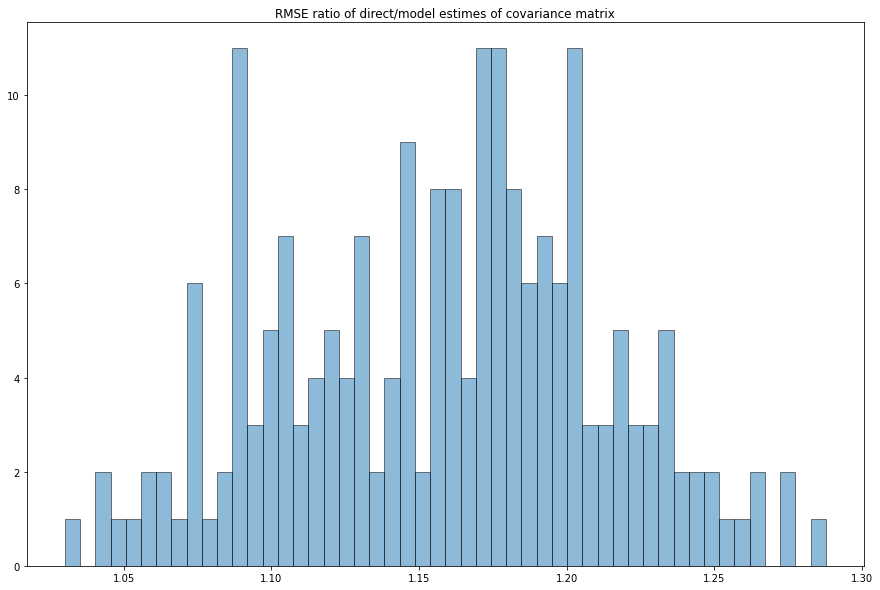

In [ ]:
M  = 200

rmse_ratio = np.ones(M)

for k in range(M):
    
    Freturns = np.random.multivariate_normal(np.zeros(3), sigmaF, size = N)

    WN =np.random.multivariate_normal(np.zeros(n), sigmaE, size = N)
    Rmatrix = Freturns@B + WN
    
    hat_covR_1 = np.cov(Rmatrix.T)
    hatB = np.linalg.pinv(Freturns)@Rmatrix


    hatsigmaF = np.cov(Freturns.T)

    residuals = Rmatrix - Freturns@hatB

    hatsigmaE = np.diag(np.var(residuals, axis =0))
    
    hat_covR_2 = hatB.T@hatsigmaF@hatB + hatsigmaE
    
    RMSE1 = np.sqrt(np.mean((covR - hat_covR_1)**2))

    RMSE2 =  np.sqrt(np.mean((covR - hat_covR_2)**2))
    rmse_ratio[k] = RMSE1/RMSE2
    
  


plt.figure(figsize = (15,10))
plt.hist(rmse_ratio, bins = 50, alpha = .5, edgecolor="black")    


plt.title("RMSE ratio of direct/model estimes of covariance matrix")

plt.show()
    
    
    
    
    
    